## Pinterest Product Promotion Trend Analyzer 
Analyze Pinterest post data to discover trends in product promotions, user engagement, and visual marketing strategies.

### Introduction 
This project focuses on analyzing product promotion trends using Pinterest post data. Pinterest is a visual discovery platform widely used by brands for product marketing. The goal is to extract patterns from pins to understand what makes a product post successful.

### Objective: 
Analyze user engagement metrics (likes, repins, comments). Identify visual and textual features that improve promotion success. Understand seasonal or category-based trends in product promotions. 
### Dataset:
Source: https://github.com/luminati-io/Pinterest-dataset-samples/blob/master/Pinterest-posts.csv 
Features: Post ID, Description, Image Link, Number of Repins, Likes, Comments, Category, Date, etc.

### STEP 1: DATA LOADING
##### -Loading the data
##### -Checking number of rows and columns and their data types

In [2]:
df = pd.read_csv("/Users/aasthasingh/Downloads/Pinterest-posts.csv")


In [3]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              1000 non-null   object 
 1   post_id          1000 non-null   int64  
 2   title            998 non-null    object 
 3   content          972 non-null    object 
 4   date_posted      1000 non-null   object 
 5   user_name        1000 non-null   object 
 6   user_url         1000 non-null   object 
 7   user_id          1000 non-null   int64  
 8   followers        1000 non-null   int64  
 9   likes            1000 non-null   int64  
 10  categories       986 non-null    object 
 11  source           0 non-null      float64
 12  attached_files   1000 non-null   object 
 13  image_video_url  1000 non-null   object 
 14  video_length     1000 non-null   int64  
 15  hashtags         997 non-null    object 
 16  comments_num     1000 non-null   int64  
 17  comments       

In [5]:
df.columns


Index(['url', 'post_id', 'title', 'content', 'date_posted', 'user_name',
       'user_url', 'user_id', 'followers', 'likes', 'categories', 'source',
       'attached_files', 'image_video_url', 'video_length', 'hashtags',
       'comments_num', 'comments', 'discovery_input', 'post_type'],
      dtype='object')

### STEP 2: DATA CLEANING
##### Cleaning and transforming the dataset as per the needs of the problem statement

In [6]:
# Convert 'date_posted' to datetime format
df['date_posted'] = pd.to_datetime(df['date_posted'], errors='coerce')

# Extract useful time features
df['month'] = df['date_posted'].dt.month
df['day'] = df['date_posted'].dt.day_name()
df['hour'] = df['date_posted'].dt.hour


/var/folders/gd/hf92mc3x3pn6zj46pjjds8rr0000gn/T/ipykernel_79293/3906017230.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_posted'] = pd.to_datetime(df['date_posted'], errors='coerce')


In [7]:
df[['date_posted', 'month', 'day', 'hour']].head(10)


,date_posted,month,day,hour
0,NaT,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN
5,NaT,NaN,NaN,NaN
6,NaT,NaN,NaN,NaN
7,NaT,NaN,NaN,NaN
8,NaT,NaN,NaN,NaN
9,NaT,NaN,NaN,NaN


In [8]:
df['date_posted'].head(10)


0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
5   NaT
6   NaT
7   NaT
8   NaT
9   NaT
Name: date_posted, dtype: datetime64[ns]

In [9]:
# Re-load the CSV to get original values again
df = pd.read_csv("/Users/aasthasingh/Downloads/Pinterest-posts.csv")

# Check the first few raw entries in 'date_posted'
df['date_posted'].head(10)


0    "2022-06-11T00:02:08.000Z"
1    "2024-05-01T12:30:48.000Z"
2    "2024-06-28T16:57:59.000Z"
3    "2024-04-06T12:32:54.000Z"
4    "2022-07-22T04:23:33.000Z"
5    "2022-12-15T17:00:40.000Z"
6    "2024-06-28T21:21:23.000Z"
7    "2024-01-15T03:17:58.000Z"
8    "2022-06-05T15:06:20.000Z"
9    "2024-08-24T22:20:23.000Z"
Name: date_posted, dtype: object

### STEP 3: DATE CLEANING AND TIME FEATURE EXTRACTION
##### The "date_posted" column contains string values hence the entries are converted to proper datetime format.

In [10]:
# Remove the quotes around the date strings
df['date_posted'] = df['date_posted'].str.replace('"', '')

# Convert to datetime format
df['date_posted'] = pd.to_datetime(df['date_posted'], errors='coerce')

# Create useful time features
df['month'] = df['date_posted'].dt.month
df['day'] = df['date_posted'].dt.day_name()
df['hour'] = df['date_posted'].dt.hour


In [11]:
df[['date_posted', 'month', 'day', 'hour']].head(10)


,date_posted,month,day,hour
0,2022-06-11 00:02:08+00:00,6,Saturday,0
1,2024-05-01 12:30:48+00:00,5,Wednesday,12
2,2024-06-28 16:57:59+00:00,6,Friday,16
3,2024-04-06 12:32:54+00:00,4,Saturday,12
4,2022-07-22 04:23:33+00:00,7,Friday,4
5,2022-12-15 17:00:40+00:00,12,Thursday,17
6,2024-06-28 21:21:23+00:00,6,Friday,21
7,2024-01-15 03:17:58+00:00,1,Monday,3
8,2022-06-05 15:06:20+00:00,6,Sunday,15
9,2024-08-24 22:20:23+00:00,8,Saturday,22


### STEP 4: PLOTTING GRAPHS FOR UNDERSTANDING PATTERNS AND TRENDS

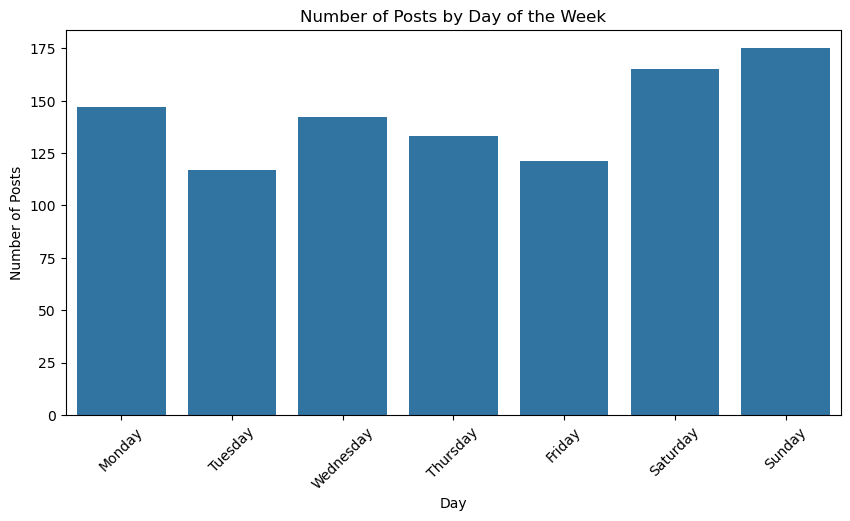

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x='day', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Number of Posts by Day of the Week")
plt.ylabel("Number of Posts")
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.show()


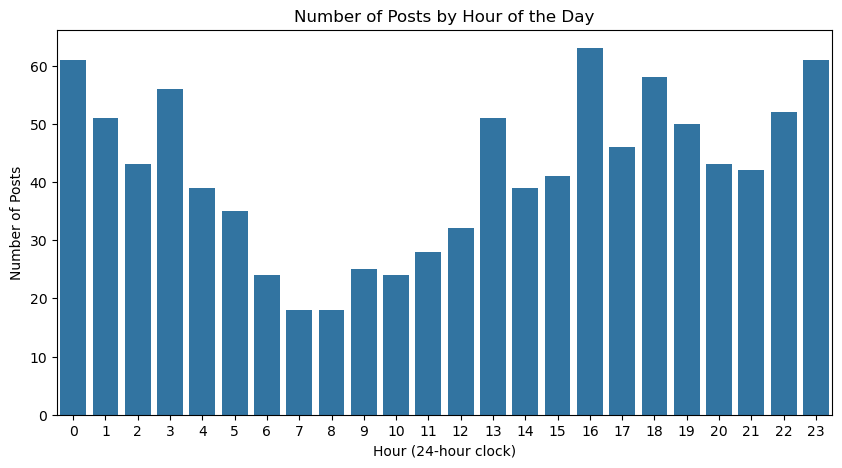

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x='hour', data=df)
plt.title("Number of Posts by Hour of the Day")
plt.xlabel("Hour (24-hour clock)")
plt.ylabel("Number of Posts")
plt.show()


In [15]:
df.columns


Index(['url', 'post_id', 'title', 'content', 'date_posted', 'user_name',
       'user_url', 'user_id', 'followers', 'likes', 'categories', 'source',
       'attached_files', 'image_video_url', 'video_length', 'hashtags',
       'comments_num', 'comments', 'discovery_input', 'post_type', 'month',
       'day', 'hour'],
      dtype='object')

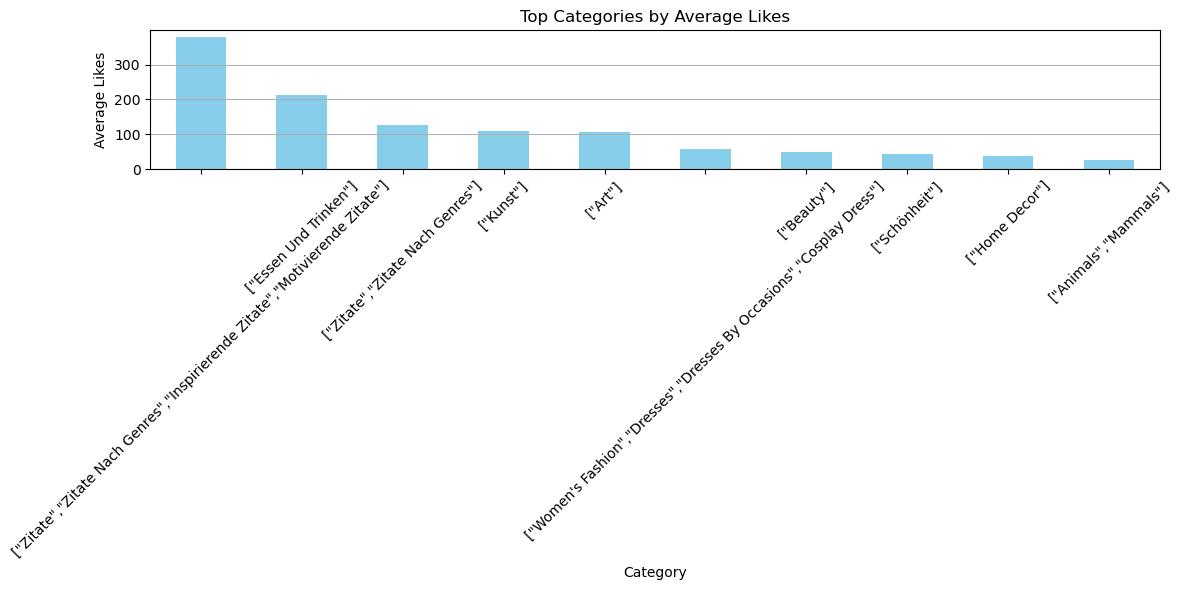

In [16]:
df.groupby('categories')['likes'].mean().sort_values(ascending=False).head(10).plot(
    kind='bar', figsize=(12,6), color='skyblue'
)
plt.title("Top Categories by Average Likes")
plt.ylabel("Average Likes")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### OBSERVATIONS:
##### 1. Relatively higher number of posts appear on the weekends.

#####        This shows that Pinterest users are most active on weekends, suggesting these are ideal days for product promotions to reach                more people.


##### 2. Posts peak around midnight and evening. There are less posts in the morning around 7-8 am.

#####        This gives a hint that users browse or post during late night and before bed. Brands should target these hours for higher                   visibility.


##### 3. Highest likes go to the categories like "Food and drink","Inspirational quotes","Fashion","Home decor".
#####        This means that in order to maximize likes one should focus on visually engaging categories such as food, quotes, and                       fashion-related promotions.